In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, \
        classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
                                    PolynomialFeatures
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model, svm
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator
import csv
from itertools import permutations, combinations, chain, tee
import scipy.special
import random
import math
from collections import defaultdict, OrderedDict
from catboost import CatBoostRegressor
from catboost import CatBoost

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_scores(y_test, y_pred):
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('R2:  ', r2_score(y_test, y_pred))
    print('VAR:  ', np.var(y_test))

In [3]:
df = pd.read_csv('dataset12.csv')

c:\users\admin\work\featureimportance\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['filename', 'cyclo', 'cyclo_method_avg', 'cyclo_method_min',
       'cyclo_method_max', 'npath_method_avg', 'npath_method_min',
       'npath_method_max', 'ncss', 'ncss_method_avg', 'ncss_method_min',
       'ncss_method_max', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20_5', 'P20_7', 'P20_11', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P28', 'P29', 'P30', 'P33', 'M1', 'M2', 'M3_1', 'M3_2', 'M3_3', 'M3_4',
       'M4', 'M5', 'M6', 'lines_P1', 'lines_P2', 'lines_P3', 'lines_P4',
       'lines_P5', 'lines_P6', 'lines_P7', 'lines_P8', 'lines_P9', 'lines_P10',
       'lines_P11', 'lines_P12', 'lines_P13', 'lines_P14', 'lines_P15',
       'lines_P16', 'lines_P17', 'lines_P18', 'lines_P19', 'lines_P20_5',
       'lines_P20_7', 'lines_P20_11', 'lines_P21', 'lines_P22', 'lines_P23',
       'lines_P24', 'lines_P25', 'lines_P26', 'lines_P28', 'lines_P29',
       'lines_P30', 'lines_P33'

In [5]:
def get_patterns_config():
        return {
            "patterns": [
                {"name": "Asserts", "code": "P1", "make": lambda: P1()},
                {"name": "Setters", "code": "P2", "make": lambda: P2()},
                {"name": "Empty Rethrow", "code": "P3", "make": lambda: P3()},
                {"name": "Prohibited class name", "code": "P4", "make": lambda: P4()},
                {"name": "Force Type Casting", "code": "P5", "make": lambda: P5()},
                {"name": "Count If Return", "code": "P6", "make": lambda: P6()},
                {"name": "Implements Multi", "code": "P7", "make": lambda: P7()},
                {"name": "Instance of", "code": "P8", "make": lambda: P8()},
                {"name": "Many primary constructors", "code": "P9", "make": lambda: P9()},
                {"name": "Method chain", "code": "P10", "make": lambda: P10()},
                {"name": "Multiple try", "code": "P11", "make": lambda: P11()},
                {"name": "Non final attribute", "code": "P12", "make": lambda: P12()},
                {"name": "Null check", "code": "P13", "make": lambda: P13()},
                {"name": "Partial synchronized", "code": "P14", "make": lambda: P14()},
                {"name": "Redundant catch", "code": "P15", "make": lambda: P15()},
                {"name": "Return null", "code": "P16", "make": lambda: P16()},
                {"name": "String concat", "code": "P17", "make": lambda: P17()},
                {"name": "Super Method", "code": "P18", "make": lambda: P18()},
                {"name": "This in constructor", "code": "P19", "make": lambda: P19()},
                {
                    "name": "Var declaration distance for 5 lines",
                    "code": "P20_5",
                    "make": lambda: P20(5)
                },
                {
                    "name": "Var declaration distance for 7 lines",
                    "code": "P20_7",
                    "make": lambda: P20(7)
                },
                {
                    "name": "Var declaration distance for 11 lines",
                    "code": "P20_11",
                    "make": lambda: P20(11)
                },
                {"name": "Var in the middle", "code": "P21", "make": lambda: P21()},
                {"name": "Array as function argument", "code": "P22", "make": lambda: P22()},
                {"name": "Joined validation", "code": "P23", "make": lambda: P23()},
                {"name": "Non final class", "code": "P24", "make": lambda: P24()},
                {"name": "Private static method", "code": "P25", "make": lambda: P25()},
                {"name": "Public static method", "code": "P26", "make": lambda: P26()},
                #{"name": "Var siblings", "code": "P27", "make": lambda: P27()},
                {"name": "Null Assignment", "code": "P28", "make": lambda: P28()},
                {"name": "Multiple While", "code": "P29", "make": lambda: P29()},
                {"name": "Protected Method", "code": "P30", "make": lambda: P30()},
                #{"name": "Send Null", "code": "P31", "make": lambda: P31()},
                #{"name": "Nested Loop", "code": "P32", "make": lambda: P32()},
                #{"name": "MultipleWhile", "code": "P33", "make": lambda: P33()},

            ],
            "metrics": [
                {"name": "Entropy", "code": "M1", "make": lambda: M1()},
                {"name": "NCSS lightweight", "code": "M2", "make": lambda: M2()},
                {
                    "name": "Indentation counter: Right total variance",
                    "code": "M3_1",
                    "make": lambda: M3(right_var=True)
                },
                {
                    "name": "Indentation counter: Left total variance",
                    "code": "M3_2",
                    "make": lambda: M3(left_var=True)
                },
                {
                    "name": "Indentation counter: Right max variance",
                    "code": "M3_3",
                    "make": lambda: M3(max_right=True)
                },
                {
                    "name": "Indentation counter: Left max variance",
                    "code": "M3_4",
                    "make": lambda: M3(max_left=True)
                },
                {"name": "Cognitive Complexity", "code": "M4", "make": lambda: M4()},
                {"name": "LCOM4", "code": "M5", "make": lambda: M5()},
                {"name": "Max diameter of AST", "code": "M6", "make": lambda: M6()}
            ],
            "target": {

            },
            "patterns_exclude": [
                "P27",  # empty implementation
                'P31',  # errors
                'P32',  # errors
            ],
            "metrics_exclude": []
        }

In [6]:
ONLY_PATTERNS = []
PATTERNS_CODE = []
config = get_patterns_config()
for x in get_patterns_config()['patterns']:
    if x['code'] not in get_patterns_config()['patterns_exclude']:
        ONLY_PATTERNS.append(x['name'])
        PATTERNS_CODE.append(x['code'])
FEATURES_NUMBER = len(ONLY_PATTERNS)
print("Number of features: ", FEATURES_NUMBER)

Number of features:  31


In [7]:
pt = {x['code']: x['name'] for x in config['patterns']}
mt = {x['code']: x['name'] for x in config['metrics']}
# pt, mt
replace_dict = dict(pt, **mt)
replace_dict

{'P1': 'Asserts',
 'P2': 'Setters',
 'P3': 'Empty Rethrow',
 'P4': 'Prohibited class name',
 'P5': 'Force Type Casting',
 'P6': 'Count If Return',
 'P7': 'Implements Multi',
 'P8': 'Instance of',
 'P9': 'Many primary constructors',
 'P10': 'Method chain',
 'P11': 'Multiple try',
 'P12': 'Non final attribute',
 'P13': 'Null check',
 'P14': 'Partial synchronized',
 'P15': 'Redundant catch',
 'P16': 'Return null',
 'P17': 'String concat',
 'P18': 'Super Method',
 'P19': 'This in constructor',
 'P20_5': 'Var declaration distance for 5 lines',
 'P20_7': 'Var declaration distance for 7 lines',
 'P20_11': 'Var declaration distance for 11 lines',
 'P21': 'Var in the middle',
 'P22': 'Array as function argument',
 'P23': 'Joined validation',
 'P24': 'Non final class',
 'P25': 'Private static method',
 'P26': 'Public static method',
 'P28': 'Null Assignment',
 'P29': 'Multiple While',
 'P30': 'Protected Method',
 'M1': 'Entropy',
 'M2': 'NCSS lightweight',
 'M3_1': 'Indentation counter: Right to

In [8]:
df = df.rename(columns=replace_dict)

In [9]:
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss > 20) & (df.ncss < 100) & (df.npath_method_avg < 100000.00)].copy().reset_index()
                       
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
columns_patterns =  ONLY_PATTERNS

In [10]:
df.shape

(41053, 85)

In [11]:
class TwoFoldRankingModel(BaseEstimator):

    def __init__(self):
        self.do_rename_columns = False
        self.model = None
        self.features_conf = None

    def fit(self, X, y, display=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            y: np.array with shape (number of snippets,), array of snippets'
                complexity metric values
            display: bool, to output info about training or not
        """
        model = CatBoostRegressor()

        grid = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}

        #model.grid_search(
        #    grid,
        #    X=X,
        #    y=y,
        #    verbose=display,
        #)

        self.model = model
        self.model.fit(X, y.ravel(), logging_level='Silent')

    def __get_pairs(self, item, th: float):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        pattern_importances = item * self.model.feature_importances_
        # mask discards not significant patterns
        th_mask = (sigmoid(pattern_importances) <= th) + 0
        pattern_importances = pattern_importances * th_mask
        order = np.arange(self.model.feature_importances_.size)
        return (pattern_importances, order)

    def __vstack_arrays(self, res):
        return np.vstack(res).T

    def predict(self, X, return_acts=False, quantity_func='log', th=1.0):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            quantity_func: str, type of function that will be applied to
                number of occurrences.
            th (float): Sensitivity of algorithm to recommend.
                0 - ignore all recomendations
                1 - use all recommendations
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        ranked = []
        quantity_funcs = {
            'log': lambda x: np.log1p(x) / np.log(10),
            'exp': lambda x: np.exp(x + 1),
            'linear': lambda x: x,
        }

        for snippet in X:
            try:
                item = quantity_funcs[quantity_func](snippet)
                pairs = self.__vstack_arrays(self.__get_pairs(item, th))
                pairs = pairs[pairs[:, 0].argsort()]
                ranked.append(pairs[:, 1].T.tolist()[::-1])
            except Exception:
                raise Exception("Unknown func")

        if not return_acts:
            return (np.array(ranked), pairs[:, 0].T.tolist()[::-1])
        return np.array(ranked), pairs[:, 0].T.tolist()[::-1], np.zeros(X.shape[0]) - 1

    def get_array(self, X, mask, i, incr):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns).
            mask: np.array with shape (number of snippets, number of patterns).
            i: int, 0 <= i < number of patterns.
            add: bool.
        Returns:
            X1: modified np.array with shape (number of snippets, number of patterns).
        """

        X1 = X.copy()
        X1[:, i][mask[:, i]] += incr * X1[:, i][mask[:, i]]

        return X1

    def get_minimum(self, c1, c2, c3):
        """
        Args:
            c1, c2, c3: np.array with shape (number of snippets, ).
        Returns:
            c: np.array with shape (number of snippets, ) -
            elemental minimum of 3 arrays.
            number: np.array with shape (number of snippets, ) of
            arrays' numbers with minimum elements.            .
        """

        c = np.vstack((c1, c2, c3))

        return np.min(c, 0), np.argmin(c, 0)

    def informative(self, X, return_acts=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
            acts: np.array with shape (number of snippets, ) of
            numbers of necessary actions for complexity's decrement.
            0 - do not modify the pattern, 1 - decrease by 1, 2 - increase by 1.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        k = X.shape[1]
        complexity = self.model.predict(X)
        mask = X > 0
        importances = np.zeros(X.shape)
        actions = np.zeros(X.shape)
        for i in range(k):
            complexity_minus = self.model.predict(self.get_array(X, mask, i, -1))
            complexity_plus = self.model.predict(self.get_array(X, mask, i, 1))
            c, number = self.get_minimum(complexity, complexity_minus, complexity_plus)
            importances[:, i] = complexity - c
            actions[:, i] = number

        ranked = np.argsort(-1 * importances, 1)
        if not return_acts:
            return ranked, importances
        acts = actions[np.argsort(ranked, 1) == 0]
        return ranked, importances, acts


## target - Cognitive Complexity

In [12]:
ONLY_PATTERNS = ['Asserts',
 'Setters',
 'Empty Rethrow',
 'Prohibited class name',
 'Force Type Casting',
 'Count If Return',
 'Implements Multi',
 'Instance of',
 'Many primary constructors',
 'Method chain',
 'Multiple try',
 'Non final attribute',
 'Null check',
 'Partial synchronized',
 'Redundant catch',
 'Return null',
 'String concat',
 'Super Method',
 'This in constructor',
 'Var declaration distance for 5 lines',
 'Var declaration distance for 7 lines',
 'Var declaration distance for 11 lines',
 'Var in the middle',
 'Array as function argument',
 'Joined validation',
 'Non final class',
 'Private static method',
 'Public static method',
 'Null Assignment',
 'Multiple While',
 'Protected Method']
FEATURES_NUMBER = len(ONLY_PATTERNS)

In [13]:
X = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss'].values.reshape((-1, 1)))
y = df[['Cognitive Complexity']].values[:, 0] / df['ncss'].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=42)

### Bayessian regression

In [23]:
from sklearn.linear_model import BayesianRidge, ARDRegression

In [16]:
b_model = BayesianRidge()

In [17]:
b_model.fit(X_train, y_train)

BayesianRidge()

In [18]:
print_scores(y_test, b_model.predict(X_test))

MSE:  0.022727317928244322
MAE:  0.10735104217657261
R2:   0.34821436828711516
VAR:   0.034869314115619894


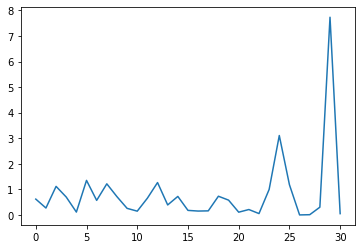

In [22]:
plt.plot(np.arange(len(ONLY_PATTERNS)), np.abs(b_model.coef_))

In [24]:
ard_model = ARDRegression()

In [25]:
%time ard_model.fit(X_train, y_train)

Wall time: 284 ms


ARDRegression()

In [27]:
print_scores(y_test, ard_model.predict(X_test))

MSE:  0.02271886820560653
MAE:  0.10734513452773052
R2:   0.34845669374868793
VAR:   0.034869314115619894


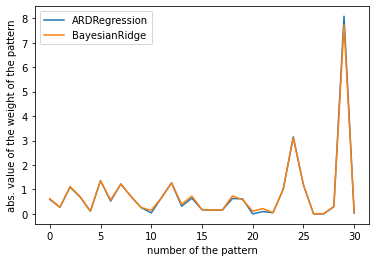

In [57]:
plt.plot(np.arange(len(ONLY_PATTERNS)), np.abs(ard_model.coef_), label = 'ARDRegression')
plt.plot(np.arange(len(ONLY_PATTERNS)), np.abs(b_model.coef_), label = 'BayesianRidge')
plt.legend()
plt.xlabel('number of the pattern')
plt.ylabel('abs. value of the weight of the pattern')
plt.show()

There is a dimensional reduction task. Bayessian regression can zero some features, leave only most importance features. We used ARDRegression and BayesianRidge, but these models didn't help to significantly reduce the dimension.

### Boosting

Additional models to predict complexity

#### Xgboost

In [31]:
import xgboost as xgb

In [34]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
print_scores(y_test, model.predict(X_test))

MSE:  0.018677959990220414
MAE:  0.09330615374349953
R2:   0.46434392347701714
VAR:   0.034869314115619894


#### Lightgbm

In [37]:
import lightgbm as lgbm

In [38]:
model = lgbm.sklearn.LGBMRegressor()
model.fit(X_train, y_train)
print_scores(y_test, model.predict(X_test))

MSE:  0.018662600889046227
MAE:  0.09336598674696783
R2:   0.4647843996252792
VAR:   0.034869314115619894


#### RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print_scores(y_test, model.predict(X_test))

MSE:  0.018690134685006132
MAE:  0.08909462238958779
R2:   0.4639947713616257
VAR:   0.034869314115619894


#### GradientBoostingRegressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print_scores(y_test, model.predict(X_test))

MSE:  0.019201408572821172
MAE:  0.09737869917514765
R2:   0.44933219766947474
VAR:   0.034869314115619894


-----------------------------------------